In [2]:
import pickle 

with open('../Caenorhabditis_elegans_dataset.pkl', 'rb') as file: 
    df = pickle.load(file)

df.head()

,compound_name,dosage,fingerprint,avg_lifespan_change_percent
0,(R)-2-hydroxyglutarate,8 mM,"[0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, ...",42.90
1,"(R,R)-cis-Diethyl tetrahydro-2,8-chrysenediol",33 µM,"[0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, ...",7.00
2,(S)-2-hydroxyglutarate,8 mM,"[0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, ...",31.80
3,"1,2,4-triazolo[1,5-a]pyridine",500 nM,"[0, 0, 0, 1, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, ...",12.00
4,"1,7-dimethylxanthine",50 µg/mL,"[0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, ...",14.75


We now seperate out inputs (ECFP) and outputs (affect on lifespan) 

In [3]:
import numpy as np

# Convert fingerprint lists into NumPy array for ML compatibility
X = np.array(df['fingerprint'].tolist())

# Use lifespan change as the target variable
y = df['avg_lifespan_change_percent'].values

print(f"Feature shape (X): {X.shape}")  
print(f"Target shape (y): {y.shape}") 

Feature shape (X): (516, 2048)
Target shape (y): (516,)


In [4]:
from sklearn.model_selection import cross_val_score
from sklearn.ensemble import RandomForestRegressor

# Perform 5-fold cross-validation
model = RandomForestRegressor(n_estimators=100, random_state=42)
scores = cross_val_score(model, X, y, cv=5, scoring='r2')


Splitting that dataset into 80% training, 20% testing

In [7]:
from sklearn.model_selection import train_test_split
from sklearn.metrics import r2_score

# 80% training, 20% testing
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

print(f"Training set size: {X_train.shape}, Test set size: {X_test.shape}")

# Train the final model on the full training set
model.fit(X_train, y_train)

# Evaluate on the test set
y_pred = model.predict(X_test)
r2 = r2_score(y_test, y_pred)
print(f"Test Set R² Score: {r2:.3f}")

Training set size: (412, 2048), Test set size: (104, 2048)
Test Set R² Score: -0.075


Testing our model with the RandomForestRegressor model 

In [8]:
from sklearn.ensemble import RandomForestRegressor

# Initialize the model with 100 trees
model = RandomForestRegressor(n_estimators=100, random_state=42)

# Train the model
model.fit(X_train, y_train)

# Make predictions on the test set
y_pred = model.predict(X_test)

print("Random Forest training completed.")


Random Forest training completed.


To measure the accuracy of our model, we use a seaborn plot. 

In [9]:
import sys
print(sys.executable)

/usr/local/bin/python3.12


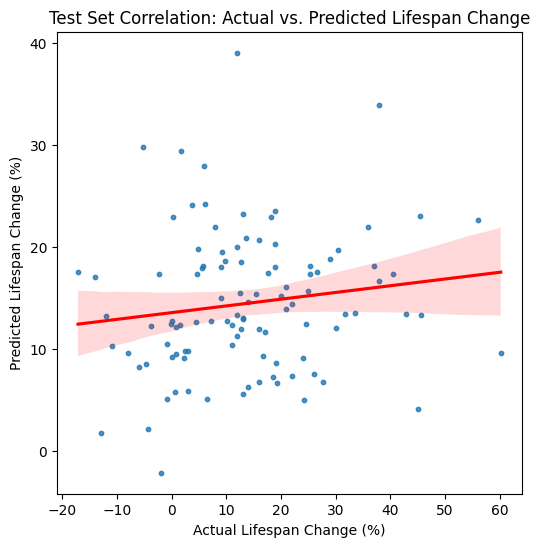

In [11]:
import seaborn as sns
import matplotlib.pyplot as plt

# Scatterplot of actual vs predicted values
plt.figure(figsize=(6, 6))
sns.regplot(x=y_test, y=y_pred, scatter_kws={'s': 10}, line_kws={'color': 'red'})
plt.xlabel("Actual Lifespan Change (%)")
plt.ylabel("Predicted Lifespan Change (%)")
plt.title("Test Set Correlation: Actual vs. Predicted Lifespan Change")
plt.show()

In [12]:
from sklearn.metrics import r2_score

r2 = r2_score(y_test, y_pred)
print(f"R² Score: {r2:.3f}")

R² Score: -0.075
